In [1]:
# Importing the relevant Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
le=LabelEncoder()

In [2]:
#Load the data
df = pd.read_csv(r'C:\Users\julia\Projects\A.C. Classification\AC_clean.csv')
df.head()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneering,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


# 1 Step. Encode Variables

In [3]:
def encode(df, cols):
    unique_values = set()
    for col in cols:
        curr_unique = list(df[col].unique())
        for ele in curr_unique:
            unique_values.add(ele)
    unique_values = list(unique_values)
    unique_values.sort()
    encode_map = {}
    for index, value in enumerate(unique_values):
        encode_map[value] = index
    return encode_map

In [4]:
animal_encoding = encode(df, ['Animal'])
symptoms_encoding = encode(df, ['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'])
dangerous_encoding = encode(df, ['Dangerous'])

In [5]:
df.head()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,dog,fever,diarrhoea,vomit,weight loss,dehydration,yes
1,dog,fever,diarrhoea,cough,tiredness,pain,yes
2,dog,fever,diarrhoea,cough,vomit,anorexia,yes
3,dog,fever,breathing difficulty,cough,lethargy,sneering,yes
4,dog,fever,diarrhoea,cough,lethargy,blue eye,yes


In [6]:
df['Animal'] = df['Animal'].map(animal_encoding)

df['Symptom 1'] = df['Symptom 1'].map(symptoms_encoding)
df['Symptom 2'] = df['Symptom 2'].map(symptoms_encoding)
df['Symptom 3'] = df['Symptom 3'].map(symptoms_encoding)
df['Symptom 4'] = df['Symptom 4'].map(symptoms_encoding)
df['Symptom 5'] = df['Symptom 5'].map(symptoms_encoding)

df['Dangerous'] = df['Dangerous'].map(dangerous_encoding)

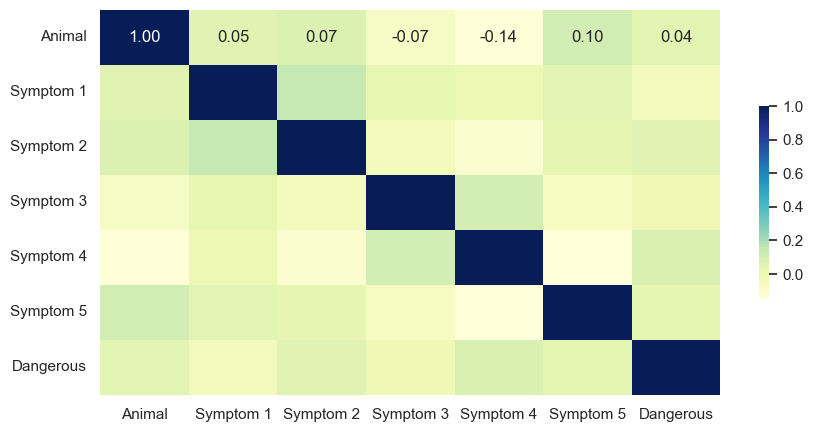

In [7]:
corr = df.corr()
ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(corr, annot=True, fmt=".2f", cbar_kws={"shrink": .5}, cmap="YlGnBu");

In [8]:
df.to_csv("encoded-data.csv", index = False) 

# 2 Step. ML Modeling

## 2.1. Data import

In [9]:
df = pd.read_csv(r'C:\Users\julia\Projects\A.C. Classification\encoded-data.csv')

df.head()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Dangerous
0,7,221,130,705,726,127,1
1,7,221,130,105,672,428,1
2,7,221,130,105,705,21,1
3,7,221,72,105,338,590,1
4,7,221,130,105,338,66,1


## 2.2. Splitting train & test datasets

In [10]:
#Choosing input features and target variable. Here the symptoms are the input features and the disease is dangerous or not is the target variable
X = df.drop("Dangerous", axis=1)
y = df["Dangerous"]

In [11]:
X.head()

,Animal,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,7,221,130,705,726,127
1,7,221,130,105,672,428
2,7,221,130,105,705,21
3,7,221,72,105,338,590
4,7,221,130,105,338,66


In [12]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Dangerous, dtype: int64

In [13]:
#Splitting the data for training and testing in the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## 2.3. Training the model

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [15]:
model_svm = SVC(kernel = 'linear', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [16]:
y_pred = model_svm.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.9885057471264368


In [18]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      0.99       172

    accuracy                           0.99       174
   macro avg       0.49      0.50      0.50       174
weighted avg       0.98      0.99      0.98       174



C:\Users\julia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\julia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\julia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#Training model on the Training Data and predicting our testing data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#Checking the accuracy of the model 
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

Accuracy: 0.9885057471264368
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.99      1.00      0.99       172

    accuracy                           0.99       174
   macro avg       0.49      0.50      0.50       174
weighted avg       0.98      0.99      0.98       174



C:\Users\julia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\julia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\julia\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
